In [237]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import numpy as np
import sklearn
import sklearn.metrics
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(100)

sns.set()
plt.rcParams['figure.figsize'] = 12, 6

/Users/Bruno/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/Bruno/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/Users/Bruno/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/Bruno/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [1]:
from util import logistic, log_likelihood
from plot_util import plot_data, plot_predictive_contourf, plot_predictive_distribution

In [285]:
def plot_ll(ll, ax=None, title='Average Log-likelihood Curve', color=(0.04, 0.7, 0.74), alpha=0.8, lw=3.1):
    if ax is None:
        fig, ax = plt.subplots()
    ax.plot(np.arange(1, len(ll) + 1), ll, color=color, alpha=0.5, lw=lw)
    ax.set_xlim(0, len(ll))
#     ax.set_ylim(min(ll) - 0.1, max(ll) + 0.1)
    ax.set_xlabel('Steps')
    ax.set_ylabel('Average log-likelihood')
    ax.set_title(title)
    return ax


def plot_train_test_ll(train_ll, test_ll, ax=None, colors=None):
    if ax is None:
        fig, ax = plt.subplots()
    if colors == None:
        colors=sns.color_palette('hls', 2)
    ax = plot_ll(train_ll, ax=ax, color=colors[0])
    plot_ll(test_ll, ax=ax, color=colors[1])
    
    train_patch = matplotlib.patches.Patch(color=colors[0], label='Training Data')
    test_patch = matplotlib.patches.Patch(color=colors[1], label='Test Data')
    plt.legend(handles=[train_patch, test_patch], loc='lower right')
    return ax


def expand_with_ones(X):
    return np.hstack((X, np.ones([X.shape[0], 1])))

In [241]:
# Load data
X = np.loadtxt('X.txt')
y = np.loadtxt('y.txt')

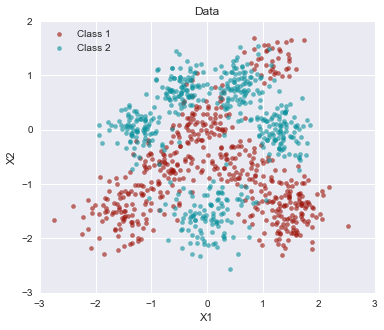

In [347]:
# Plot the input data
fix, ax = plt.subplots(figsize=(6, 5))
plot_data(X, y, ax=ax)
plt.xlim(-3, 3)
plt.ylim(-3, 2)
plt.savefig('plots/data.png', dpi=200, bbox_inches='tight')

In [243]:
from models import LogisticClassifier
from util import 

In [250]:
# Perform the train-test split
X_train, y_train, X_test, y_test, train_idxs = split_data(X, y)

### Perform optimisation with bias terms

In [251]:
X_train_expanded, X_test_expanded, X_expanded = map(lambda x: expand_with_ones(x), [X_train, X_test, X])

##### Fixed Learning Rate

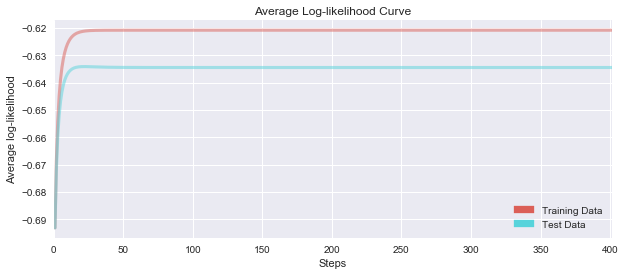

In [284]:
train_ll = []
test_ll = []
num_steps = 400
lr = 1e-3

model = LogisticClassifier(X_train_expanded.shape[1])
train_ll.append(model.compute_avg_ll(X_train_expanded, y_train))
test_ll.append(model.compute_avg_ll(X_test_expanded, y_test))

# Train loop
for i in range(num_steps):
    model.update_weights(X_train_expanded, y_train, lr=lr)
    train_ll.append(model.compute_avg_ll(X_train_expanded, y_train))
    test_ll.append(model.compute_avg_ll(X_test_expanded, y_test))

# Plot the log-likehood against steps
# fig, (ax0, ax1) = plt.subplots(ncols=2, sharey=True, figsize=(12, 3))
# colors = sns.color_palette('hls', 2)
# plot_ll(train_ll, ax=ax0, title='Log-likelihood on Train Data', color=colors[0], alpha=0.8)
# plot_ll(test_ll, ax=ax1, title='Log-likelihood on Test Data', color=colors[1], alpha=0.8)
fig, ax = plt.subplots(figsize=(10, 4))
plot_train_test_ll(train_ll, test_ll, ax=ax)
# plt.savefig('plots/log_reg_ll_curves_lr_too_large.png', dpi=200, bbox_inches='tight')

##### Exponential Decay

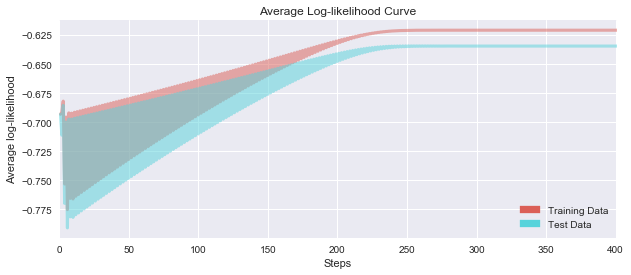

In [283]:
train_ll = []
test_ll = []
num_steps = 400
init_lr = 1e-2
decay_rate = 1e-3

model = LogisticClassifier(X_train_expanded.shape[1])
train_ll.append(model.compute_avg_ll(X_train_expanded, y_train))
test_ll.append(model.compute_avg_ll(X_test_expanded, y_test))

# Train loop
for i in range(num_steps):
    lr = init_lr * np.exp(-decay_rate * i)
    model.update_weights(X_train_expanded, y_train, lr=lr)
    train_ll.append(model.compute_avg_ll(X_train_expanded, y_train))
    test_ll.append(model.compute_avg_ll(X_test_expanded, y_test))

fig, ax = plt.subplots(figsize=(10, 4))
plot_train_test_ll(train_ll, test_ll, ax=ax)
# plt.savefig('plots/log_reg_ll_curves_exp_decay.png', dpi=200, bbox_inches='tight')

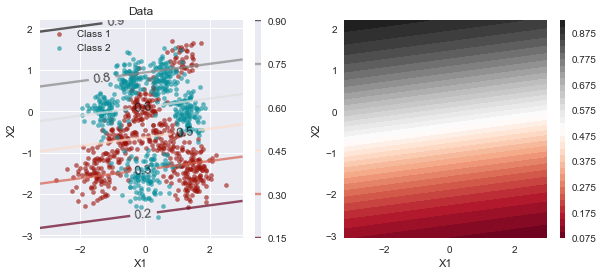

In [286]:
## Visualise the predictions
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))
predict_func = lambda x: model.predict_with_expanded(x, expand_with_ones)
_, xrange, yrange = plot_predictive_distribution(X, y, predict_func, ax=ax1)
plot_predictive_contourf(predict_func, xrange, yrange, ax=ax2)
# plt.savefig('plots/log_reg_ll_pred_distr.png', dpi=200, bbox_inches='tight')

In [287]:
final_train_ll = train_ll[-1]
final_test_ll = test_ll[-1]
y_probs = model.predict(X_test_expanded)
y_predicted = np.where(y_probs > 0.5, 1, 0) 

confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_predicted) / y_test.shape[0]
print(confusion_matrix, final_train_ll, final_test_ll)

[[0.35  0.145]
 [0.125 0.38 ]] -0.6208252091858103 -0.6344759580747896


## Radial Basis Functions (RBF)

In [288]:
from util import transform_to_rbf

In [289]:
class RBFLogisticClassifier(LogisticClassifier):
    def __init__(self, radial_basis, width):
        super(RBFLogisticClassifier, self).__init__(radial_basis.shape[0] + 1)
        self.radial_basis = radial_basis
        self.width = width
        return
    
    def transform_to_rbf(self, data):
        return transform_to_rbf(data, self.radial_basis, self.width)
    
    def predict_with_rbf_transform(self, X):
        return self.predict(self.transform_to_rbf(X))

In [290]:
radial_basis = X_train

#### Width 1

In [355]:
width = 1e-2

In [356]:
train_ll = []
test_ll = []
num_steps = 1000
init_lr = 2e-2 # Need to adjust depending on width
decay_rate = 1e-4

model = RBFLogisticClassifier(radial_basis, width)
X_train_rbf, X_test_rbf = map(model.transform_to_rbf, [X_train, X_test])

train_ll.append(model.compute_avg_ll(X_train_rbf, y_train))
test_ll.append(model.compute_avg_ll(X_test_rbf, y_test))

# Train loop
for i in range(num_steps):
    lr = init_lr * np.exp(-decay_rate * i)
    model.update_weights(X_train_rbf, y_train, lr=lr)
    train_ll.append(model.compute_avg_ll(X_train_rbf, y_train))
    test_ll.append(model.compute_avg_ll(X_test_rbf, y_test))

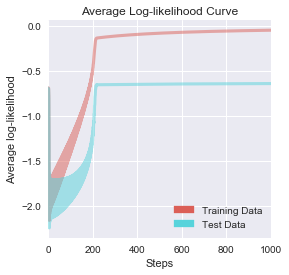

In [357]:
fig, ax = plt.subplots(figsize=(4, 4))
plot_train_test_ll(train_ll, test_ll, ax=ax)
plt.savefig('plots/rbflog_reg_ll_curves_width001tight.png', dpi=200, bbox_inches='tight')

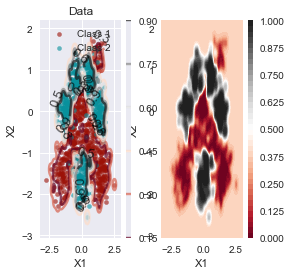

In [348]:
## Visualise the predictions
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(4,4))
predict_func = model.predict_with_rbf_transform
_, xrange, yrange = plot_predictive_distribution(X, y, predict_func, ax=ax1)
plot_predictive_contourf(predict_func, xrange, yrange, ax=ax2)
plt.savefig('plots/rbflog_reg_pred_distr_width01tight.png', dpi=200, bbox_inches='tight')

In [343]:
final_train_ll = train_ll[-1]
final_test_ll = test_ll[-1]
y_probs = model.predict(X_test_rbf)
y_predicted = np.where(y_probs > 0.5, 1, 0) 

confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_predicted) / y_test.shape[0]
print(confusion_matrix, final_train_ll, final_test_ll)

[[0.465 0.03 ]
 [0.07  0.435]] -0.13017780850782867 -0.2658147470872875
